In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importing the copy library to deep copy lists
import copy

In [2]:
# we define a function to calculate the integral based on trapezoidal rule
def trp_int(f,a,b,n):
  # inputs:
  # f: the function to integrate
  # a: start point
  # b: end point
  # n: number of intervals

  # h, step size
  h = (b-a)/n
  x = np.linspace(a,b,num = n+1,endpoint = True)
  sum = 0

  for i in range(n):
    sum+= (f(x[i]) + f(x[i+1]))/2

  return sum*h

In [3]:
# we now define a function for romberg integration
def romberg_int(f,a,b):
  MAXIT = 10
  int_est_array1 = []
  for i in range(MAXIT):
    int_est_array1.append(trp_int(f,a,b,2**i))

  int_est_array2 = []

  for i in range(MAXIT - 1):
    n = len(int_est_array1)
    for j in range(n-1):
      int_est_array2.append(((4**(i+1))*int_est_array1[j+1] - int_est_array1[j])/((4**(i+1)) - 1))
    int_est_array1 = copy.deepcopy(int_est_array2)

  return int_est_array1[0]


In [4]:
# we now define the function to be integrated
def f(x):
  if(x<1e-12): return 0
  else: return (x**4)*np.exp(x)/((np.exp(x) - 1)**2)

# we also define g(u)
def g(u):
  if(u==0): return 0
  else: return (u**3)*romberg_int(f,0,1/u)




In [5]:
# calculating integrals at points between 0 and 1 with interval 0.5
x = np.linspace(0,1,num = 21,endpoint = True)
y = []

for i in x:
  y.append(g(i))

In [6]:
# creating table
dict = {
    'u':x,
    'g(u)':y
}
print("Table of values of the function g(u) evaluated at different values of u\n")
df = pd.DataFrame(dict)
df

Table of values of the function g(u) evaluated at different values of u



,u,g(u)
0,0.00,0.000000
1,0.05,0.000757
2,0.10,0.029214
3,0.15,0.080492
4,0.20,0.129939
5,0.25,0.171358
6,0.30,0.203948
7,0.35,0.228948
8,0.40,0.248043
9,0.45,0.262718


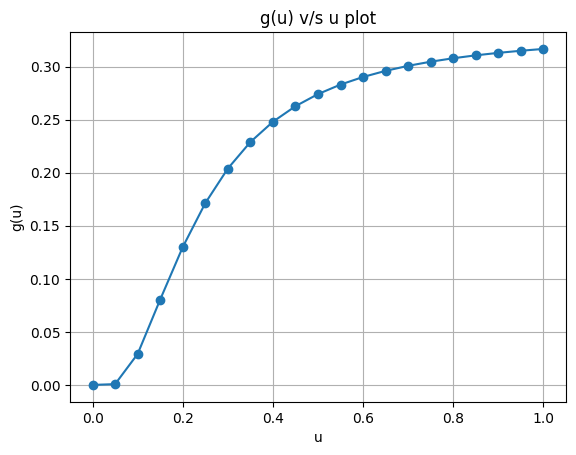

In [7]:
# plotting commands
plt.grid()
plt.plot(x,y,'-o')
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('g(u) v/s u plot')
plt.show()